#                                         TRANSFER LEARNING

**Transfer learning** as the name indicates transferring the knowledge from one domain to another. Building a new model or train and tune a neural network from scratch will consume lot of time, energy, computational resources like GPU etc. It is the faster and cheapest way to build a most accurate machine learning model.

A machine learning model which was created by machine learning experts and these models are already trained on the large datasets, such models are used in **Transfer learning**. These models may have different number of output/labels. The most basic form of tranfer learning thus involves changing the last layer of the pre-trained model which enables the model to have same number of output/labels as the dataset considered. 



This tutorial implements two image classification models namely:

> **1. VGG16 - Virtual Geometry group 16**

> **2. MobileNetV2**



# Dataset 



**Cats vs dogs** is an image dataset with **two** classes involving one classifying photo either as a **dog or a cat**.  This dataset was used in Kaggle competition held in 2013, this dataset is comprised of photos of dogs and cats which are picked from 3 million photos released by Microsoft.
This dataset contains closely 25000 images, there are 12500 number of dog and cat images, the data has to be split into train, validation and test dataset manually. 


This tutorial utilizes filtered cats & dog dataset which is a small sample extracted from the cats vs dogs dataset.


In [0]:
# Importing all the necessary packages.
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16,MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation

When we are training our convolutional Neural Network, the expected output from CNN model is to detect the objects or images regardless of the sizes, shapes or even positions. Let’s consider an example the dataset which is considered in this tutorial i.e. cats vs dogs’ dataset – the model here is trained to detect which is cat and which is a dog. In this case our model should recognize the dogs or cats irrespective of how big the cat or dog is or even if the position of these animals in the image for instance left side of image, right, center or corners etc. There can be scenarios where the dog image can be in certain angle or even if there is a certain part of a dog or cat. To detect the correct output the CNN needs to be trained for all these scenarios, if there is less data points which lacks all the scenarios above the model is likely to get overfit. 

This problem can be avoided using Image Augmentation, Image Augmentation creates new images with providing random transformation to the original training set. 

Below are some of the available image augmentation techniques in TensorFlow:

> 1.	Flipping the image – Horizontally or Vertically.
> 2.	Greyscale an image.
> 3.	Saturate the image.
> 4.	Change image brightness.
> 5.	Rotate the image.
> 6.	Cropping the image.
> 7.	Shear intensity.
> 8.	Color Augmentation.
> 9.	Random Zoom.
> 10.	Scaling.
> 11.	Shift in width.
> 12.	Shift in height.

Image augmentation is done to avoid the overfitting of the data, solve the issue of a smaller number of data available and create a model which has better unseen data and over fitting. 

The brief explanation of some commonly used techniques in Image augmentation:

> 1.	Flipping the image:

>> The above functionality generates images which are flipped either horizontally or vertically flipped based on the user input. The selected images are random, TensorFlow module ImageDataGenerator has features like horizontal flip = True or Vertical flip =True.

> 2.	Rotating an image:

>> The rotation augmentation will rotate the images to certain random angle in the range specified by the user,  for example if we need a rotation till range 45, we can mention rotation angle = 45.

> 3.	Random zoom or Zoom:

>> Zoom augmentation applies random zoom to images as specified by the user. For instance, zoom range = 0 .5 applies zoom up to 50% randomly to the images.

> 4.	Image Brightness:

>> The brightness shifts value from a range specified for randomly selected images. For example, brightness range = ( 0.1, 0.7). The idea here is 0.0 is no brightness and 1 responds to max brightness. 

> 5.	Shear Intensity:

>> This operation slants the image to an angle, this works on keeping the axis constant at one position and stretching the image on a certain angle again which can be called as shear angle.

> 6.	Width Shifting:

>> The fraction of total image width is shifted randomly, the user inputs the range between 0.0 and 1.0. The width shift can be either towards right or left.

There are many more augmentation methods available, for further methods available please visit - https://www.tensorflow.org/api_docs/python/tf/image


**Downloading Dataset**


The download the dataset from google storage using the get_file function from the tensorflow keras utils package.  

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


**Creating directory paths**

Creating training and validation directory paths to fetch the respective data.

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

**Image Augmentation Explained Step Wise**

**Function to Plot Images**

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plot_augmented_image(images):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

**Image Augmentation 1 : Horizontal Flip**

The below functionality generates images which are flipped horizontally and to achive this feature the command used is horizontal flip = True in ImageDataGenrator.

Found 2000 images belonging to 2 classes.


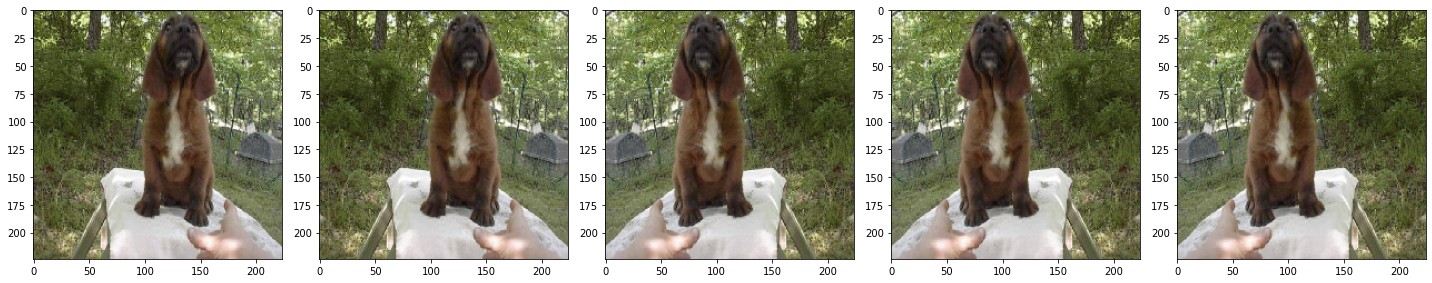

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Image Augmentation 2 : Rotation of Image**

The rotation augmentation will rotate the images to certain angle specified by the user,  for example in this case rotation angle = 40. This is achieved by mentioning rotation_angle=40 in the ImageDataGenerator.

Found 2000 images belonging to 2 classes.


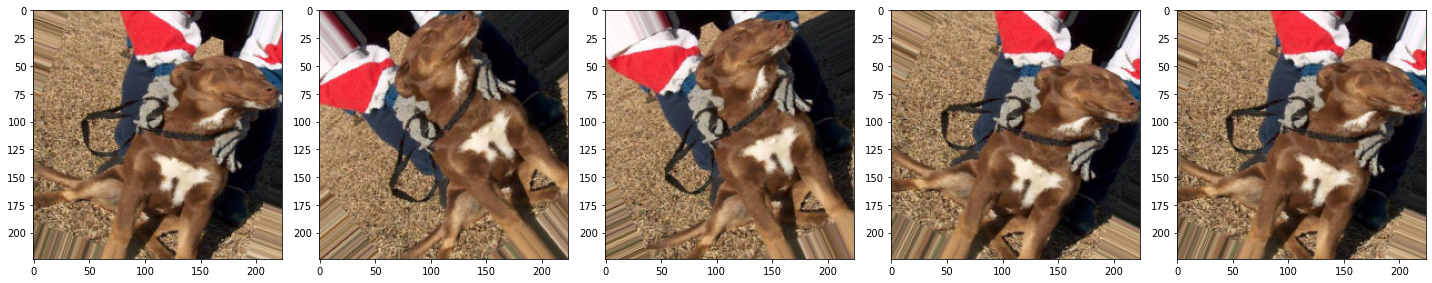

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=40)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Image Augmentation 3 : Width shift**

The fraction of total image width is shifted randomly, the user inputs the range between 0.0 and 1.0. The width shift can be either towards right or left. In this case the width shift range=0.2 and it can be accomplished by providing the input to the ImageDataGenerator. 

Found 2000 images belonging to 2 classes.


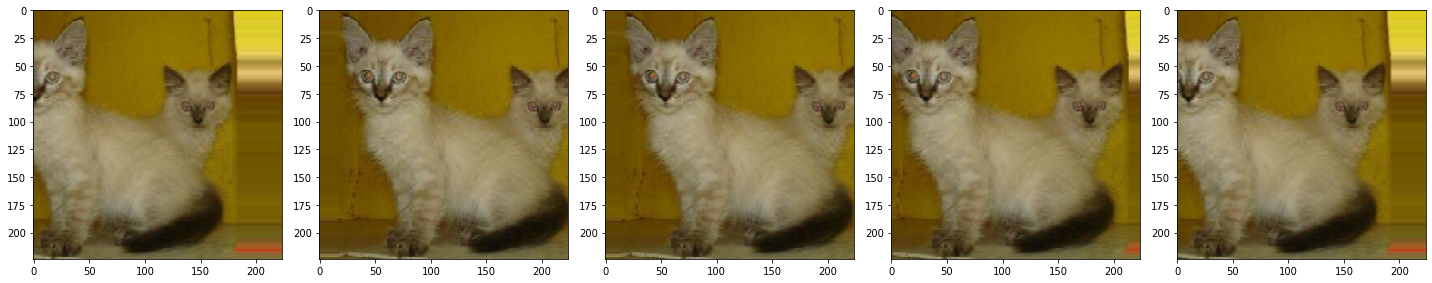

In [0]:
image_gen = ImageDataGenerator(rescale=1./255,  width_shift_range=0.2)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Image Augmentation 4 : height shift**

The fraction of total image height is shifted randomly, the user inputs the range. The height shift can be either towards top end or bottom. In this case the height shift range=0.2 and it can be accomplished by providing the input to the ImageDataGenerator. 

Found 2000 images belonging to 2 classes.


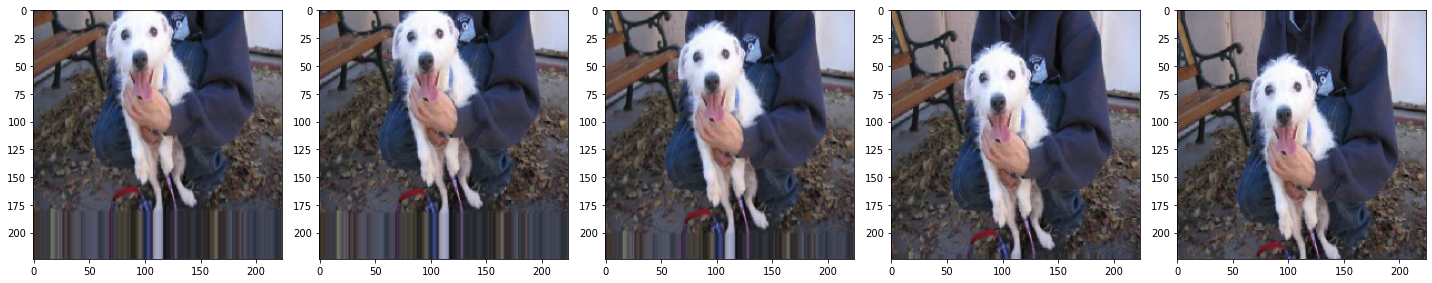

In [0]:
image_gen = ImageDataGenerator(rescale=1./255,  height_shift_range=0.2)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Image Augmentation 5 : shear shift**

This operation slants the image to an angle, this works on keeping the axis constant at one position and stretching the image on a certain again which can be called as shear angle. In this case shear range is 0.2 and it can be implmented by providing the shear_range=0.2 to ImageDataGenerator.

Found 2000 images belonging to 2 classes.


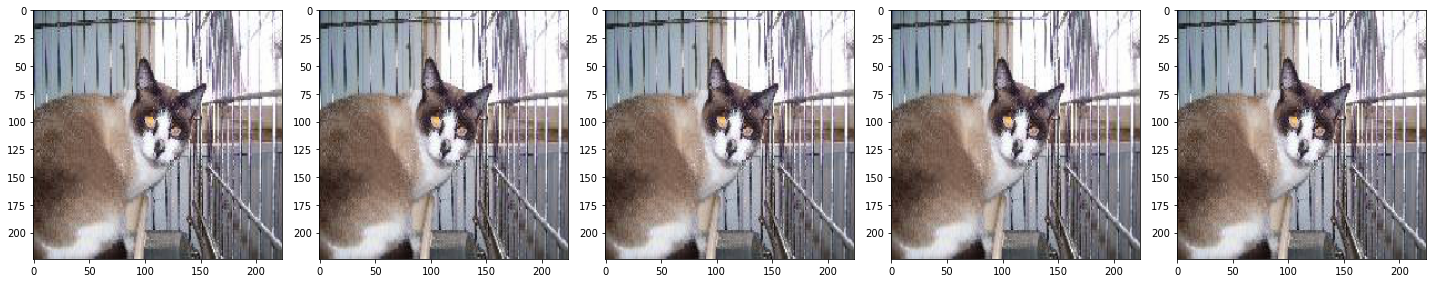

In [0]:
image_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Image Augmentation  : Zoom**

Zoom augmentation applies random zoom to images as specified by the user. For instance, zoom range =0.2 applied zoom up to 20% randomly to the images.

Found 2000 images belonging to 2 classes.


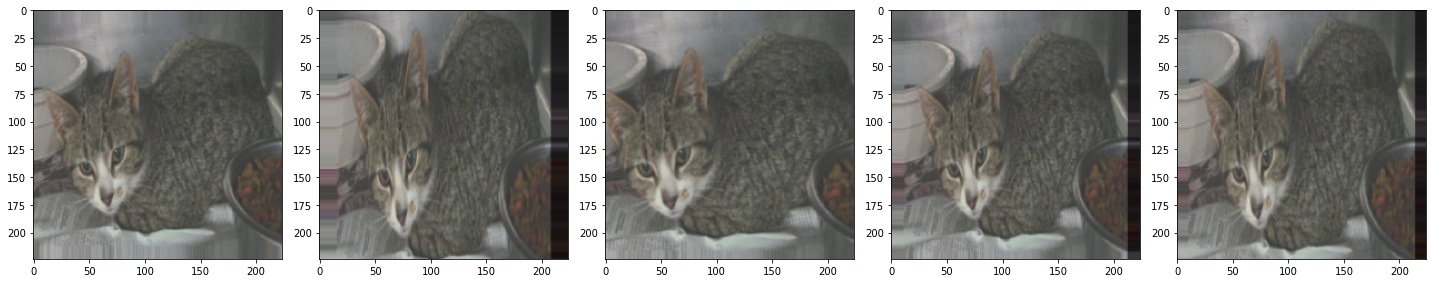

In [0]:
image_gen = ImageDataGenerator(rescale=1./255,  zoom_range=0.2)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(224,224))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_augmented_image(augmented_images)

**Applying all the above image augmentation techniques**

Combining all the parameters shown above we generate the random augmented samples of the training set. 

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our training data

aug_train_image_generator = ImageDataGenerator(
                                    rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                     ) # Generator for augmented training data.

image_gen_val = ImageDataGenerator(rescale=1./255) # Generator for augmented validation data.


**Creating batches of Augmented data**


In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

# flow_from_directory creates the path to the  directory & generates batches of augmented data.
train_data_gen = train_image_generator.flow_from_directory(                     # Batches for training.
                                                      batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary'
                                                     )
# Batches for augumented data
aug_train_data_gen = aug_train_image_generator.flow_from_directory(batch_size=batch_size, 
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

# Batches for validation data
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Function to plot loss and accuracy graphs**

In [0]:
def plot_graph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

Transfer learning as the name indicates transferring the knowledge from one domain to another. Building a new model or train and tune a neural network from scratch will consume lot of time, energy, computational resources like GPU etc. It is the faster and cheapest way to build a most accurate machine learning model.

Types of Transfer Learning:

> 1.	Inductive:

>> In this method a model trained on a specific or related domain is used to improve the performance of the current task.

> 2.	Transductive:

>> This method involves utilizing an existing supervised model to another unlabeled data set, here the new data set will now possess the labeled classes.

> 3.	Unsupervised:

>> This method as indicates utilizing a model which was trained on a unsupervised dataset on a new unlabeled dataset. 

In this tutorial Inductive method of transfer learning is explained.


# Building the first Transfer Learning Model

**VGG16 – Virtual Geometry group 16**



![alt text](https://docs.google.com/drawings/d/e/2PACX-1vT5c9gSvHJaDOwaL4_j_NrM4YLeO4SlOzK2P8LEaWadJ3wjz6U6j15HNxHqOY2ztOJ__gz9rlqkmNtF/pub?w=960&h=720)

VGG is a convolutional neural network model which was proposed at University of Oxford. The Architecture of VGG16 contains a preprocessing layer which  normalizes the RGB image by subtracting it with mean image values. The name  VGG16 comes as it has 16 layers and these layers are made up of Convolutional, Max Pooling, Activation and Fully connected layers. 

If we look at the split of these layers there are 13 convolutional layers in them, 5 max pooling and 3 dense layers.

The VGG16 model uses 3x3 convolutional layer one above the other so as to increase the depth. The max pooling layers will reduce the volume size. Out of 3 layers 2 fully connected layers and above that there is a SoftMax layer. The number 16 indicates the total weight layers. 

Some of the drawbacks of VGG16 are :

> 1. They are slow while training the data due to depth of convolution and fully connected nodes the model itself is around 533mb. 


# VGG16 on original training data 

This model utilizes wieghts from the Imagenet model and the input shape accepted by the model is 224,224,3.

ImageNet is a large image dataset with 14 million images, original ImageNet contains 20000+ categories, for example typical categories include Balloons, strawberry, apple etc. 

creating a VGG16 model object without top dense layers.

In [0]:
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Adding Dense Layers**

Add Dense layer to the model since we have created the VGG16 model object without dense layers.

The model will train only these layers and use the Imagenet pretrained lower layers.

The classification task has two outputs(binary), so the sigmoid activation function is used in the final layer.

In [0]:
base_model = models.Sequential()
base_model.add(model)
base_model.add(layers.Flatten())
base_model.add(layers.Dropout(0.5))
base_model.add(layers.Dense(256, activation='relu'))
base_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.trainable = False

In [0]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


**Compiling the model**

> **RMS optimizer**:

 >> This divides the learning rate for the weights by running a average of the magnitude of the recent gradients for that weight.

> **BinaryCrossentropy**:

>> As there are only two labels classes in the cats vs dogs dataset so the BinaryCrossentropy is used. If there are more than 2 labels then CategoricalCrossentropy is used. 


In [0]:
base_learning_rate = 0.001
base_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

> steps_per_epoch = The size of our training set is 2000. With this set shuffled into batches of 32 , we have around **2000/32 = 63** such samples. Each epoch will run 63 steps efore the next epoch starts to make sure we are traversing throughout our data. Similarly, the validation steps are 32 as we have 1000 images in our validation set (**1000/32 = 32**).

> The training and validation data are generated by the image generators declared above in the starting cells. 

> Lets run this model for 10 epochs and see the output accuracy.

In [0]:
initial_epochs = 10
validation_steps=20
history = base_model.fit(train_data_gen,
                    epochs=initial_epochs,
                    steps_per_epoch= 63,
                    validation_data=val_data_gen,
                    validation_steps=32
                    )

Epoch 1/10
63/63 [==============================] - 12s 191ms/step - loss: 0.6952 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 11s 178ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 3/10
63/63 [==============================] - 11s 178ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4920
Epoch 4/10
63/63 [==============================] - 11s 179ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/10
63/63 [==============================] - 11s 179ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 6/10
63/63 [==============================] - 11s 180ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4950
Epoch 7/10
63/63 [==============================] - 11s 180ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5030

**View the Accuracy vs epoch, cross entropy vs epoch for Training and validation steps.**


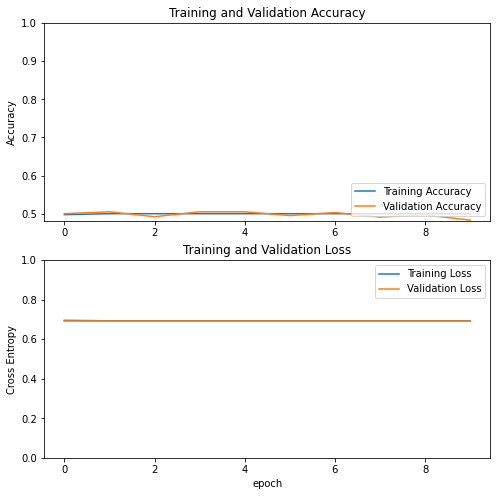

In [0]:
plot_graph(history)

**Observation**: As we observe from the above graph the model is not overfitted because the training and validation accuracy move almost hand in hand, but the accuracies obtained are very less.

This might be due to the small size of the dataset used. So further will try to improve the accuracies with techniques like Image augmentation. 

**Create a separate model with image augmentation**

Adding the same VGG model created in previous steps without the final dense layer.

 Add Dense layer to the model manually.

In [0]:
augment_model_vgg = models.Sequential()
augment_model_vgg.add(model)
augment_model_vgg.add(layers.Flatten())
augment_model_vgg.add(layers.Dropout(0.5))
augment_model_vgg.add(layers.Dense(256, activation='relu'))
augment_model_vgg.add(layers.Dense(1, activation='sigmoid'))

Using the same learning rate and optimizer as the previous model.

In [0]:
base_learning_rate = 0.001
augment_model_vgg.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
initial_epochs = 10
validation_steps=20
aug_history = augment_model_vgg.fit(aug_train_data_gen,
                    epochs=initial_epochs,
                    steps_per_epoch= 63,
                    validation_data=val_data_gen,
                    validation_steps=32
                    )

Epoch 1/10
63/63 [==============================] - 29s 462ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5140
Epoch 2/10
63/63 [==============================] - 29s 459ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 3/10
63/63 [==============================] - 29s 458ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4930
Epoch 4/10
63/63 [==============================] - 29s 461ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 5/10
63/63 [==============================] - 29s 463ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4830
Epoch 6/10
63/63 [==============================] - 29s 460ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/10
63/63 [==============================] - 29s 463ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5010

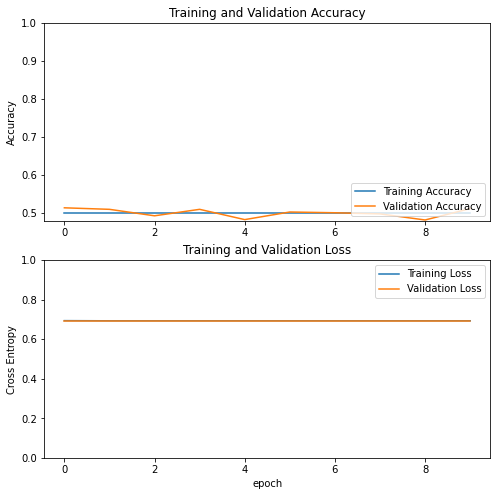

In [0]:
plot_graph(aug_history)

**Observation**: As we observe from the above graph the model is not overfitted because the training and validation accuracy move almost hand in hand, but the accuracies obtained are very less.

 further will try to improve the accuracies by fine tuning the model. 

#Fine Tuning

> If the dataset used is significantly different from the context of pretrained network, then the model has to be fine-tuned. Some of the common methods in fine tuning the model truncating the last SoftMax layer, replace with the new output layer. One good way to tune the model is to apply slower learning rate. The common practice also includes the freeze the weights from the first few layers, as the first few layers are used in understanding curves and shapes of the images, this makes a way for the network to get the required features in dataset. 

> Replacing the output layer which was trained in our case with ImageNet with 1000 classes to the label for our dataset. The new layer attached will be trained to take the features from the layers before it and map them to the desired output, in our case we are using RMS optimizer. Once this layer has been tuned for the labels of our class then the model is set trainable=true which enables the weights to be trained for the given dataset.

In this case: 

>> 1.	The original model VGG  was trained for ImageNet dataset with 1000 classes.

>> 2.	The last layer of the pretrained model was replaced.

>> 3.	The new output was categorized in two categories either cat or dog.

>> 4.	Initially trainable was set to false for all the layers as they are pretrained.

>> 5.	Then learning rate is reduced and new SoftMax layer is placed and the trainable is set to true.


In [0]:
vgg_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

To check the effect of fine tuning lets freeze the first 4 blocks and unfreeze the layers of the fifth block.

Setting VGG16 trainable as true, set the layers that are in the block 5 as trainable as shown below.

In [0]:
vgg_base.trainable = True
set_trainable = False
for layer in vgg_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Lets check which layers are going to be retrained. 

As we see below, our model will also retrain the block5_conv1, block5_conv2, block5_conv3 & block5_pool layers of the VGG model along with the output layer.

The remaining lower layers are not retrained and pretrained weights will be re-used 

In [0]:
for layer in vgg_base.layers:
  print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Add the Fine tuned VGG and top layers to the model.

Repeat the fitting steps as shown in previous models on the Augmented training set. 

As we are fine tunning our model we use a slower learning rate. Lets use 0.0001 instead of 0.001 used in previous trainings.

In [0]:
a_model = models.Sequential()
a_model.add(vgg_base)
a_model.add(layers.Flatten())
a_model.add(layers.Dropout(0.5))
a_model.add(layers.Dense(256, activation='relu'))
a_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
base_learning_rate = 0.0001
a_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
a_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 13,502,465
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
initial_epochs = 10
validation_steps=20
tuned_model_history = a_model.fit(aug_train_data_gen,
                    epochs=initial_epochs,
                    steps_per_epoch= 63,
                    validation_data=val_data_gen,
                    validation_steps=32
                    )

Epoch 1/10
63/63 [==============================] - 29s 467ms/step - loss: 0.6545 - accuracy: 0.6265 - val_loss: 0.5981 - val_accuracy: 0.7570
Epoch 2/10
63/63 [==============================] - 30s 469ms/step - loss: 0.5852 - accuracy: 0.8130 - val_loss: 0.5415 - val_accuracy: 0.9200
Epoch 3/10
63/63 [==============================] - 29s 468ms/step - loss: 0.5698 - accuracy: 0.8515 - val_loss: 0.5428 - val_accuracy: 0.9250
Epoch 4/10
63/63 [==============================] - 29s 465ms/step - loss: 0.5554 - accuracy: 0.8785 - val_loss: 0.5444 - val_accuracy: 0.9330
Epoch 5/10
63/63 [==============================] - 29s 468ms/step - loss: 0.5530 - accuracy: 0.8940 - val_loss: 0.5231 - val_accuracy: 0.9300
Epoch 6/10
63/63 [==============================] - 30s 468ms/step - loss: 0.5561 - accuracy: 0.8810 - val_loss: 0.5523 - val_accuracy: 0.9250
Epoch 7/10
63/63 [==============================] - 29s 463ms/step - loss: 0.5554 - accuracy: 0.8910 - val_loss: 0.5550 - val_accuracy: 0.8620

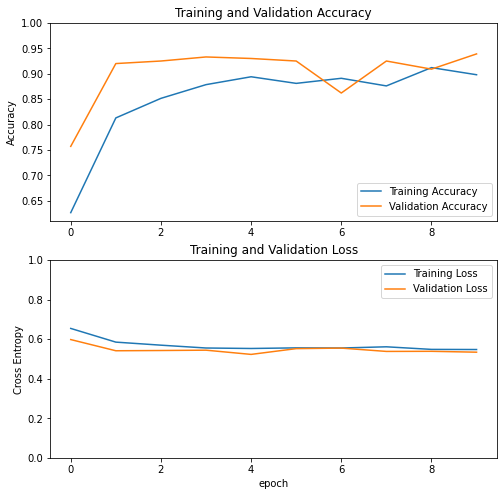

In [0]:
plot_graph(tuned_model_history)

**Observation** - Amazing! After fine tuning the model, the accuracies are skyrocketed and the training and validation accuracies are going well hand in hand indicating there is no overfitting in the model.

Lets use the same set of training data, augmented training data on one more pre-trained model to understand and compare more deeply.

The next few cells shows how the MobilenetV2 model performs with cats vs dogs data.

# Mobile NET



MobileNetV2 model was developed by google,  this model is pretrained on the ImageNet dataset, this is a large dataset containing 1.4M images and 1000 classes. ImageNet dataset consists of wide variety or categories like jackfruit to syringe. This forms the foundation for the classification of the case of cat’s vs dog’s dataset. 

MobileNetV2 contains initial convolutional layer with 32 filters, then the networks have 19 residual bottleneck layers. 

The first layer also consists of two blocks, one is residual block which has stride 1, the next block is used for downsizing with stride 2.

The Network consists of two blocks, Convolutional layer with stride 1 as the first block and stride 2 as the second block. This layer one constitutes for 1x1 convolution with RELU activation (RELU6). In the second layer it is depth wise convolution, finally the third layer is a 1x1 convolution which is linear. 

The depth wise convolution  named because it handles both  spatial dimensions, and the depth as well. If the image is colored one i.e. with 3 channels RGB, after passing through several convolutions the image might have multiple channels.  Each channel represents a part of the image, if the image has 128 channels there would be 128 interpretations of Image. The kernel is split into 2 kernels one performs depth wise and other performs point wise.

![alt text](https://docs.google.com/drawings/d/e/2PACX-1vSqhmYaw2X1W4nNIThPXs-LVXXPN9MHTBeVtYJvjrNa1WBujnD1eZ0Ir9VBDvWNX-hDf8G9eElFwppK/pub?w=961&h=568)


As we did for the VGG16 model, we don't want to include the top layer.

Rest of the layers are included which are the layers before the last flatten layer.


In [0]:

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


Use the MobileNetV2 model created above as a feature extractor. 

The feature extractor will convert the (224, 224, 3) images into (7,7,1280) dimension.

A sample of what the feature extractor will do is shown below.

In [0]:
sample_training_images, sample_labels = next(train_data_gen)


In [0]:
feature_batch = base_model(sample_training_images)
print(feature_batch.shape)

(32, 7, 7, 1280)


Freeze the layer of the model to prevent the re-training. 

In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

Adding the output layer to the model.

First step will be to convert the (7, 7, 1280) dimensions into a vector. 

This can be achieved using the average pooling. The output generated will be a vector of 1280 elements. A sample batch of 32 is used to show the steps.

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Adding the final output dense layer.

The dense layer will convert positive output to 1 and negative to 0.

In [0]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Combine the mobileNetV2 models with the manually created top layers.

In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

As there are only two labels classes in the cats vs dogs dataset so the BinaryCrossentropy is used. If there are more than 2 labels then CategoricalCrossentropy is used. 

In [0]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

> Lets run this model for 10 epochs and see the output accuracy.

In [0]:
initial_epochs = 10
validation_steps=20
history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    steps_per_epoch= 63,
                    validation_data=val_data_gen,
                    validation_steps=32
                    )

Epoch 1/10
63/63 [==============================] - 10s 163ms/step - loss: 0.2133 - accuracy: 0.9175 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 2/10
63/63 [==============================] - 10s 155ms/step - loss: 0.0792 - accuracy: 0.9700 - val_loss: 0.0656 - val_accuracy: 0.9780
Epoch 3/10
63/63 [==============================] - 10s 156ms/step - loss: 0.0546 - accuracy: 0.9815 - val_loss: 0.0617 - val_accuracy: 0.9750
Epoch 4/10
63/63 [==============================] - 10s 155ms/step - loss: 0.0474 - accuracy: 0.9840 - val_loss: 0.0569 - val_accuracy: 0.9790
Epoch 5/10
63/63 [==============================] - 10s 156ms/step - loss: 0.0408 - accuracy: 0.9860 - val_loss: 0.0522 - val_accuracy: 0.9780
Epoch 6/10
63/63 [==============================] - 10s 156ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 7/10
63/63 [==============================] - 10s 156ms/step - loss: 0.0292 - accuracy: 0.9925 - val_loss: 0.0639 - val_accuracy: 0.9810

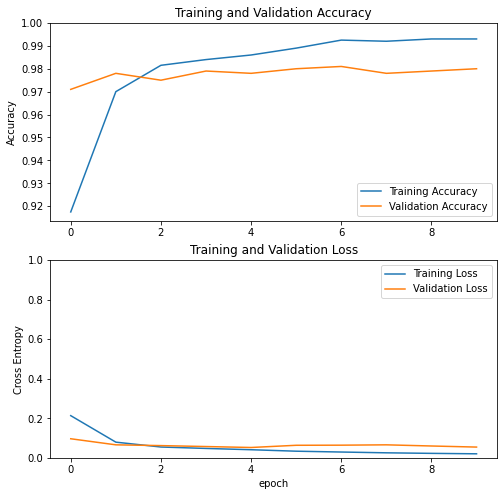

In [0]:
plot_graph(history)

**Observation** - As the graph indicates, the training and validation accuracies are moving well hand in hand and accuracy values are also high averaged around 98% for training and 97% for validation data.

Comparing VGG16 model's performance for the original dataset the MobileNetV2 outperforms VGG16. 


Let us see the MobileNETV2 performance by applying randomly augmented training images.

**MobileNetV2 with Image Augmentation**

In [0]:
model_with_aug  = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


Taking a sample of augmented data and extracting the features in the same way as done in the previous model.

In [0]:
aug_sample_training_images, sample_labels = next(aug_train_data_gen)


In [0]:
feature_batch = model_with_aug(aug_sample_training_images)
print(feature_batch.shape)


(32, 7, 7, 1280)


In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1280)
(32, 1)


In [0]:
model_with_aug.trainable = False
augmentation_model = tf.keras.Sequential([
  model_with_aug,
  global_average_layer,
  prediction_layer
])

In [0]:
base_learning_rate = 0.001
augmentation_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
augment_history = augmentation_model.fit(aug_train_data_gen,
                       epochs=10,
                       steps_per_epoch= 63,
                       validation_data = val_data_gen,
                       validation_steps = 32
                   )

Epoch 1/10
63/63 [==============================] - 32s 503ms/step - loss: 0.2586 - accuracy: 0.8815 - val_loss: 0.0995 - val_accuracy: 0.9740
Epoch 2/10
63/63 [==============================] - 31s 489ms/step - loss: 0.1380 - accuracy: 0.9440 - val_loss: 0.0756 - val_accuracy: 0.9760
Epoch 3/10
63/63 [==============================] - 31s 489ms/step - loss: 0.1159 - accuracy: 0.9515 - val_loss: 0.0636 - val_accuracy: 0.9770
Epoch 4/10
63/63 [==============================] - 31s 492ms/step - loss: 0.1105 - accuracy: 0.9535 - val_loss: 0.0574 - val_accuracy: 0.9790
Epoch 5/10
63/63 [==============================] - 31s 491ms/step - loss: 0.1013 - accuracy: 0.9580 - val_loss: 0.0582 - val_accuracy: 0.9790
Epoch 6/10
63/63 [==============================] - 31s 493ms/step - loss: 0.0979 - accuracy: 0.9640 - val_loss: 0.0598 - val_accuracy: 0.9750
Epoch 7/10
63/63 [==============================] - 31s 493ms/step - loss: 0.0915 - accuracy: 0.9595 - val_loss: 0.0444 - val_accuracy: 0.9840

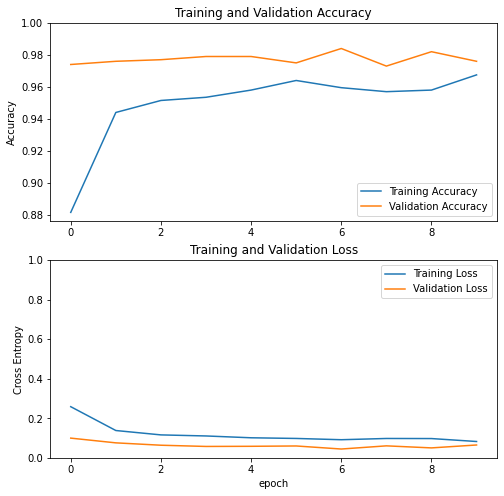

In [0]:
plot_graph(augment_history)

In [0]:
model_with_aug.trainable = True

In [0]:
print("Number of layers in the base model: ", len(model_with_aug.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_with_aug.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
base_learning_rate = 0.001
augmentation_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [0]:
augmentation_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
len(augmentation_model.trainable_variables)

58

In [0]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = augmentation_model.fit(aug_train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch= 63,
                         #initial_epoch =  augment_history.epoch[-1],
                         validation_data= val_data_gen,
                         validation_steps= 32)

Epoch 1/20
63/63 [==============================] - 28s 450ms/step - loss: 0.1900 - accuracy: 0.9280 - val_loss: 3.3767 - val_accuracy: 0.6360
Epoch 2/20
63/63 [==============================] - 28s 447ms/step - loss: 0.1711 - accuracy: 0.9320 - val_loss: 2.6721 - val_accuracy: 0.6740
Epoch 3/20
63/63 [==============================] - 28s 440ms/step - loss: 0.1560 - accuracy: 0.9365 - val_loss: 1.7619 - val_accuracy: 0.7390
Epoch 4/20
63/63 [==============================] - 28s 439ms/step - loss: 0.1251 - accuracy: 0.9450 - val_loss: 1.0157 - val_accuracy: 0.8200
Epoch 5/20
63/63 [==============================] - 28s 441ms/step - loss: 0.1188 - accuracy: 0.9455 - val_loss: 0.9064 - val_accuracy: 0.8130
Epoch 6/20
63/63 [==============================] - 28s 442ms/step - loss: 0.1256 - accuracy: 0.9485 - val_loss: 0.4164 - val_accuracy: 0.9010
Epoch 7/20
63/63 [==============================] - 28s 443ms/step - loss: 0.1238 - accuracy: 0.9485 - val_loss: 0.3453 - val_accuracy: 0.9170

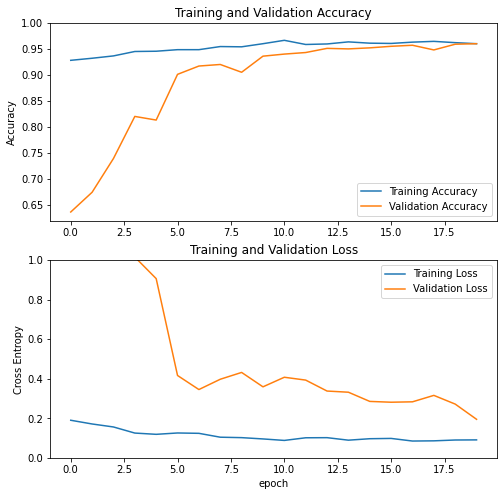

In [0]:
plot_graph(history_fine)

**Observation** - The above graph clearly indicate the model accuracy is very high for both train and validation data starting initially with huge difference and gradually learns with the epochs. The obtained accuracy is averaged 96% for training and 95% for validation set.


**Overall observation**

|Model | Variation | training accuracy | validation accuracy | 
|--|--|--|--|
|VGG16|Original|50%|49%|  
|VGG16|Augmentation|50%|49%|
|VGG16|Fine tuning|85%|92%|
|MobileNetV2|Original|98.9%|97%|
|MobileNetV2|Augmentation|94%|97%|
|MobileNetV2|Fine tuning|95%|95%|


**Conclusion** - 

> 1. The results indicate clearly the fine tuned results are in almost same for both training and validation data. There was no sign of overfitting in the model the accuracy for validation and training set were converged as the epochs increases.

> 2. The MobileNetV2 outperformed the VGG16 for the cats vs dogs dataset, the accuracy obtained at the end were almost twice the VGG16.


In [0]:
References :

1. Dr Timoty Havens Tensforflow slides.
2. http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf
3. https://www.cs.toronto.edu/~frossard/post/vgg16/
4. https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
5. https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728
6. https://wtfleming.github.io/2019/05/12/keras-cats-vs-dogs-part-2/
7. https://www.tensorflow.org/tutorials/images/transfer_learning    